# **Climate Change Belief Analysis**
-----------------

#### by Team_ZM4

<br>
<img src="https://scx2.b-cdn.net/gfx/news/hires/2019/7-climatechange.jpg" />
<br>

# **Contents**
-----------------
1. Import Libraries
  - Importing modules for data science and visualization
  - Importing NLP Libraries
  - Importing ML Libraries

2. Import Data
  - Importing train and test datasets
  
3. Explonatory Data Analysis
  - Statistical Overview
  - Missing values
  - Sentiment Visual Distributions

4. Data Preprocessing
  - Letter casing
  - Noise removal
  - Stopword removal
  - Normalization
  - Stemming
  
5. Model Building
  - Training models with inbalanced data
  - Training models with balanced data
  
6. Predict Deployment

7. Conclusion
  

## Introduction


### About Company


Dream World company deals in producing products and services that are environmentally friendly and sustainable. They have presence across all urban, semi urban and rural areas. 


### Problem Statement

The Company is looking to create products and services that is environmentally friendly. They would like to understand their consumers' view on climate change. To address this, we are going to create Machine Learning models that are able to classify whether or not a person believes in climate change, based on their novel tweet data. Correct classification of a tweet will help companies understand consumer sentiment, which will further guide their business strategies.

### Data


Variable Descriptions

- sentiment: Sentiment of tweet (pro, anti, neutral,news).

- message: Tweet body (raw tweet).

- tweetid: Twitter unique id (unique integer).

Target Variable (sentiment)

- 1 : Pro --> the tweet supports the belief of a man-made climate change.
- 2 : News --> the tweet links to factual news about climate change.
- 0 : Neutral --> the tweet neither supports nor refutes the belief of a man-made climate change.
- -1 : Anti --> the tweet does not believe in a man made climate change

# 1. **Import Packages**
------------------

In [2]:
# Importing modules for data science and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import time
mpl.rcParams['figure.dpi'] = 180
%matplotlib inline

# NLP Libraries

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
import nltk

# ML Libraries

import nltk
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer
from nltk import TreebankWordTokenizer, SnowballStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import string
import urllib

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 2. **Importing Data**
-----------------


Train.csv: Dataset that contains all the variables that should be used to train the model

Test.csv : Dataset that contains variables that will be used to test the model

In [3]:
test = pd.read_csv('test_df.csv') 
train = pd.read_csv('train_df.csv') 

# 3. **Explonatory Data Analysis**
-------------------

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

#### Display the head of both the test and train data

In [4]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


#### Display the shape of the data sets

In [6]:
print(f'Train data shape:\t{train.shape}\nTest data shape:\t{test.shape}')

Train data shape:	(15819, 3)
Test data shape:	(10546, 2)


#### Display the train dataframe information

In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### Statistical Overview



Firstly, we will take a brief overview of a summary of each numeric feature by using the `describe()` method.

In [174]:
# Looking at the how the messages are distributed across the sentiment
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


## Missing values
--------------------

- In this section we will be looking out for any missing values (i.e: np.nan values) and or all the tweets that are just empty strings.

In [175]:
# Checking for missing values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [176]:
# Checking whether a character is white-space character or not

print(len(train['message']))
print(sum(train['message'].apply(lambda x: x.isspace())))

15819
0



## Sentiment Visual Distributionsn
-------------

####  The percentage of each sentiment row

In [180]:

# count the entries per column and save them in a dataframe
categories = train['sentiment'].value_counts().to_frame()
categories.index.rename('categories',inplace=True)
categories.rename({'sentiment':'no_of_entries'},axis=1,inplace=True)
categories['percentage'] = [round(count/len(train),2) for count in categories['no_of_entries']]
categories

,no_of_entries,percentage
categories,,
1,8530,0.54
2,3640,0.23
0,2353,0.15
-1,1296,0.08


Above we have created a dataframe that shows the number of entries per category and the percentage of those entries as a faction of the total entries.


####  Visualizing the distribution of the target


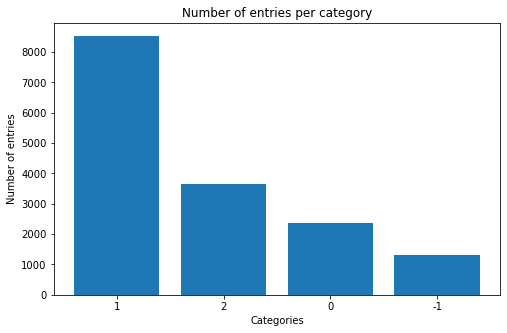

In [181]:
# Visualizing the distribution of the target 
plt.figure(figsize=(8,5))

plt.bar(x=['1','2','0','-1'],height=categories['no_of_entries'])
plt.title('Number of entries per category')
plt.xlabel('Categories')
plt.ylabel('Number of entries')
plt.show()
#del categories

As it can be seen above, the sentiment belonging to category 1 (Positive, climate change belief) is significantly higher than the other categories. In comparison to category -1 (Negative,Anti climate change belief), if a model were to be trained with this two categories only, the model not be a good classifier as it would penalise the smaller category by predicting category 1 more often. In the data processing section of this notebook, we will look into methods like resampling to try and balance the distribution of the entries.

####  Distribution plots for the label

Text(0, 0.5, 'Density')

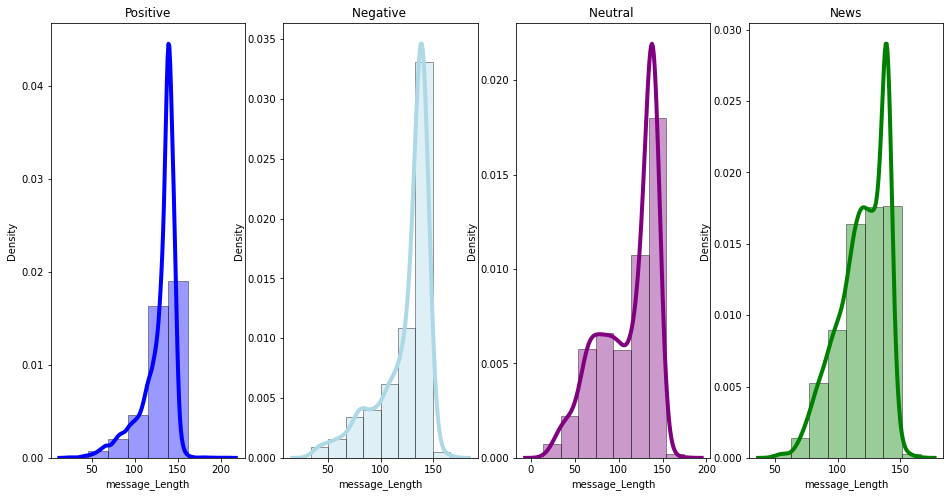

In [182]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(train[train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train[train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train[train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(train[train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

The average length of messages for all sentiments is not suprising as a tweet is only limited to 140 characters. It can be seen that the positive and negative sentiments has a high density contrst.

 Now that we have explored our dataset, we can begin perfoming some analyses on it.

####   Checking the numerical distribution

In [272]:

working_df = train.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

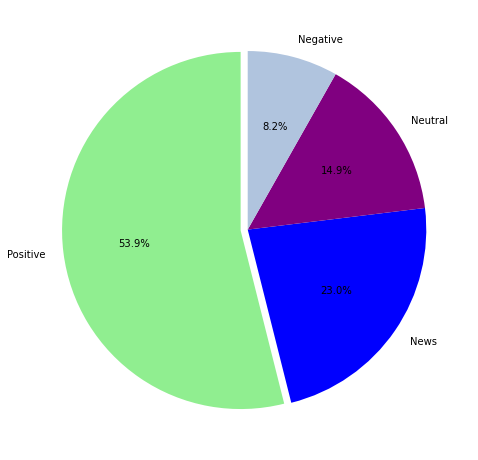

In [184]:
# checking the numerical distribution
plt.figure(figsize=(8,10))
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

The Pie-Chart Above shows that more than 50% of the tweet sample has positive sentiments about Climate Change. Tweets with negative Sentiments are the least. The news are also actively engaged on Climate Change as well, as we can see that they are the second popular.

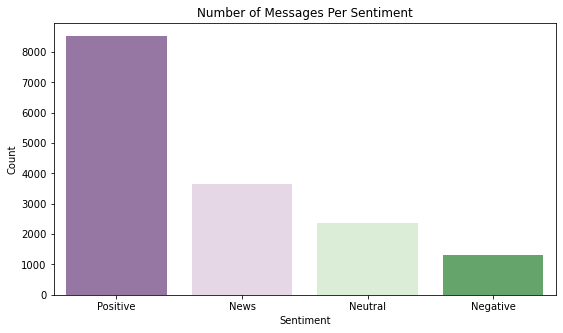

In [185]:
plt.figure(figsize=(9,5))
sns.countplot(x='sentiment' ,data = working_df, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

In perspective, there are more than 8000 Positive tweets, and the news, being the second largest, has less than 4000 tweets. Negative tweets account for less than 20% of the Positive tweets.


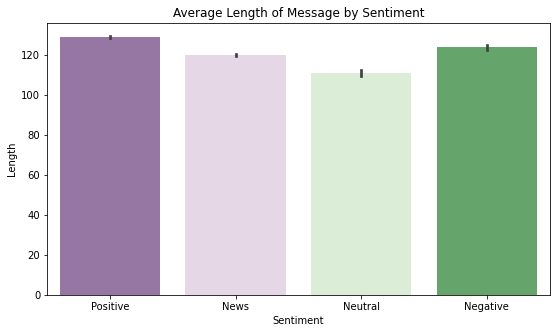

In [186]:
# Visualizing text lengths for each sentiment
plt.figure(figsize=(9,5))
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

Here we see that both negative postive tweets have roughly the highest average length of tweets, with Positive having a slightly higher average



Now we will Check whether a tagged user has any relation to the sentiment, and which users are most popular in each sentiment

In [187]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

In [188]:
# Generating Counts of users
counts = working_df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)

In [189]:
# Top 5 most popular
counts.head()

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


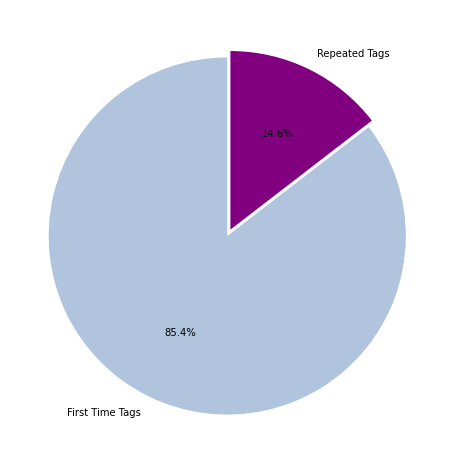

In [190]:
# checking the numerical distribution
plt.figure(figsize=(8,10))
values = [sum(np.array(counts['message']) == 1)/len(counts['message']), sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.show()

14.6% of the tweets are certain users tagged more than once. 

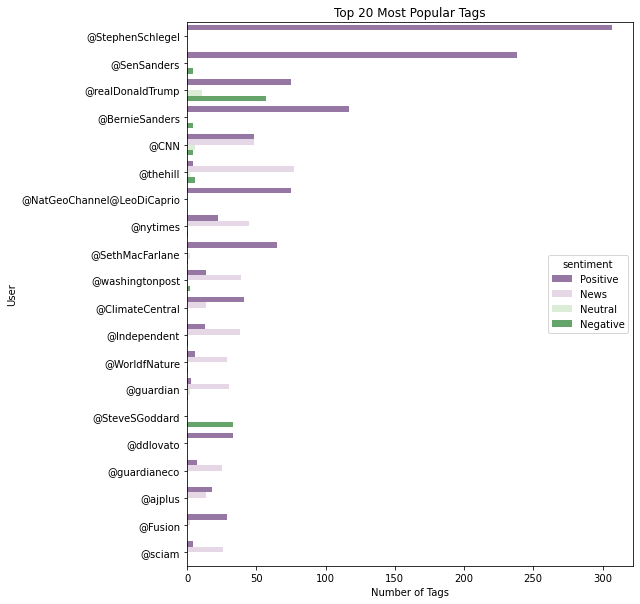

In [191]:
# Analysis of most popular tags, sorted by populariy
plt.figure(figsize=(8,10))
sns.countplot(y="users", hue="sentiment", data=working_df, palette='PRGn',
              order=working_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()
#plt.xticks(rotation=90)

We can see from the graph that most tags are from Postive, Negative and News sentiments.  We can also see from the graph that @StephenSchlegel have the most positive tweets tags and the the former President of America, @realDonaldTrump has the most negative tweets tags.

Now, that we know that most of the tags comes from the Postive, Negative and News sentiments. Lets now analyse the tags and their users separately 

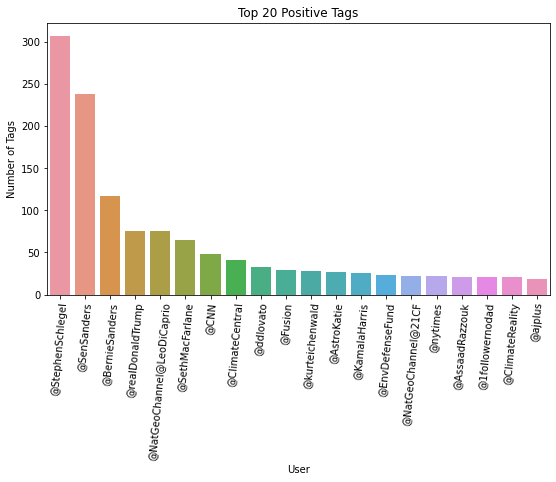

In [192]:
# Analysis of most popular tags, sorted by populariy
plt.figure(figsize=(9,5))
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'Positive'],
              order=working_df[working_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.xticks(rotation=85)
plt.show()

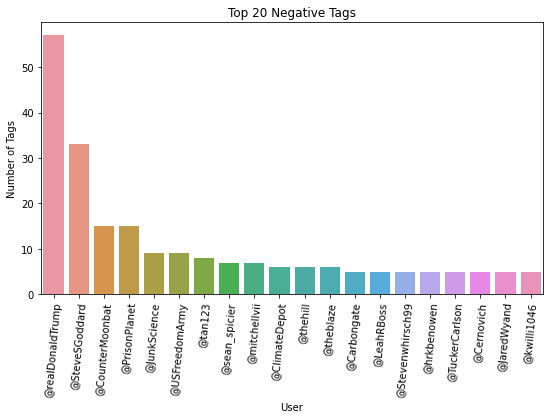

In [193]:
# Analysis of most popular tags, sorted by populariy
plt.figure(figsize=(9,5))
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'Negative'],
              order=working_df[working_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.xticks(rotation=85)
plt.show()

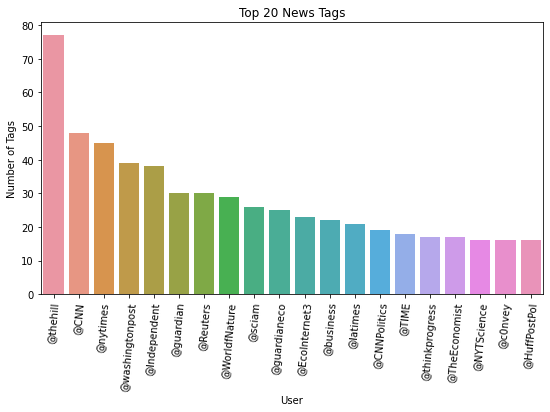

In [194]:

# Analysis of most popular tags, sorted by populariy
plt.figure(figsize=(9,5))
sns.countplot(x="users", data=working_df[working_df['sentiment'] == 'News'],
              order=working_df[working_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.xticks(rotation=85)
plt.show()

The count of negative sentiments by a single tag is much less that that of the positive sentiments. On the positive sentiments, the threshhold count, was above 300, while on the negative, it is less than 60. However, we can see that the most popular tag associated with negative tweets at this time, was the former President of the U.S.A.

# 4. Data Preprocessing
-------------


The following methods will be used to clean and process our data

- Letter casing: Converting all letters to either upper case or lower case. 
- Tokenizing: Eliminating unwanted characters, such as HTML tags, punctuation marks, special characters, white spaces etc.
- Noise removal: Some words do not contribute much to the machine learning model, so it's good to remove them. A list of stopwords can be defined by the nltk library, or it can be business-specific.
- Stopword removal: Normalization generally refers to a series of related tasks meant to put all text on the same level. Converting text to lower case, removing special characters, and removing stopwords will remove basic inconsistencies.
- Normalization: Normalization improves text matching.
- Stemming: Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem. Porter Stemmer is the most widely used technique because it is very fast. Generally, stemming chops off end of the word, and mostly it works fine.

Lets have a look at what a typical tweet looks like to get an idea of what we can expect to see from the other tweets:

#### Sample tweet

In [276]:
tweet = train.iloc[6,1]
print(tweet)

RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R



Looking at the tweet above, we see that it contains the following:

- Punctuation
- Capital letters
- Special characters
- web link/url

We can expect to find the listed items in all the tweets and we need to remove these to clean our tweets.

We start cleaning our data by removing urls we expect to find in our tweets:

In [195]:
## Remove urls
print ('Removing URLs... for Train')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['message'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

## Remove urls test
print ('Removing URLs...for Test data')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
test['message'] = test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

Removing URLs... for Train
Removing URLs...for Test data


In [196]:
# Make lower case
print ('Lowering case... Train')
train['message'] = train['message'].str.lower()

# Make lower case
print ('Lowering case... Test')
test['message'] = test['message'].str.lower()

Lowering case... Train
Lowering case... Test


In [197]:
#Noise removal:
print ('Cleaning punctuation... for Test and Train using the below function')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
train['message'] = train['message'].apply(remove_punctuation_numbers)
test['message'] = test['message'].apply(remove_punctuation_numbers)

Cleaning punctuation... for Test and Train using the below function


In [198]:
#Stopword removal:
print('removing stowords.... Train')
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(train['message'])

print('removing stowords.... Test')
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(test['message'])

removing stowords.... Train
removing stowords.... Test


In [199]:
#Removed NonAscii
print ('removing NonAscii')
def _removeNonAscii(s): return "".join(i for i in s if ord(i)<128)
train['message'] = train['message'].apply(_removeNonAscii)
test['message'] = test['message'].apply(_removeNonAscii)

removing NonAscii


In [200]:
#Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem
ps = PorterStemmer()
stemmed_words = [ps.stem(w) for w in train['message']]
stemmed_words = [ps.stem(w) for w in test['message']]

#lemmatizer = WordNetLemmatizer()
#lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in train['message']]
#lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in test['message']]

In [201]:
pd.set_option('display.max_colwidth', -1)
train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt rawstory researchers say we have three years to act on climate change before its too late urlweb urlweb,698562
3,1,todayinmaker wired was a pivotal year in the war on climate change urlweb,573736
4,1,rt soynoviodetodas its and a racist sexist climate change denying bigot is leading in the polls electionnight,466954


Now, our data is clean, we can building our model

# 5. Model Building
-------------


#### Models to be trained:


- Logistic Regression
- Support Vector Classification (SVC)
- Linear SVC
- Random Forest Classifier


## Training with inbalanced data

#### Train Test Split

Split the train_data into training and testing data. This is to make sure that there isn't any leakage of information when we actually fit the test_data that we imported. To avoid overfitting, we are using the train_data to train and test our models.

In [202]:
#Splitting you Data for X and Y
X_NT = train['message']
y = train['sentiment']

#### Vectorization

Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text. In this guide, we'll implement vectorization using tf-idf. There are other techniques as well, such as Bag of Words and N-grams.

In [203]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_NT)

#### Train-test split:

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training and Predictions

#### Random Forest Classifier

Random forest models are an example of an ensemble method that is built on decision trees (i.e. it relies on aggregating the results of an ensemble of decision trees). Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree. In random forest models, the trees are randomized and the model returns the mean prediction of all the individual trees

In [205]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rf_accuracy = accuracy_score(y_test,rfc_pred)
rf_f1 = round(f1_score(y_test, rfc_pred, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, rfc_pred))
report = classification_report(y_test, rfc_pred, output_dict=True)
pd.DataFrame(report).transpose()

accuracy_score 0.7142857142857143


,precision,recall,f1-score,support
-1,0.958333,0.165468,0.282209,278.000000
0,0.638498,0.320000,0.426332,425.000000
1,0.698302,0.913960,0.791708,1755.000000
2,0.782178,0.671388,0.722561,706.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.769328,0.517704,0.555702,3164.000000
weighted avg,0.731832,0.714286,0.682434,3164.000000


#### LinearSVC

The objective of a Linear Support Vector Classifier is to return a "best fit" hyperplane that categorises the data. It is similar to SVC with the kernel parameter set to ’linear’, but it is implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and can scale better to large numbers of samples.

In [206]:
lsvc = LinearSVC(C=0.8, verbose=0)
lsvc.fit(X_train,  y_train)
lsvc_pred = lsvc.predict(X_test)
lsvc_accuracy = accuracy_score(y_test,lsvc_pred)
lsvc_f1 = round(f1_score(y_test, lsvc_pred, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, lsvc_pred))
report = classification_report(y_test, lsvc_pred, output_dict=True)
pd.DataFrame(report).transpose()


accuracy_score 0.7689633375474083


,precision,recall,f1-score,support
-1,0.771930,0.474820,0.587973,278.000000
0,0.607717,0.444706,0.513587,425.000000
1,0.793316,0.879202,0.834054,1755.000000
2,0.772049,0.805949,0.788635,706.000000
accuracy,0.768963,0.768963,0.768963,0.768963
macro avg,0.736253,0.651169,0.681062,3164.000000
weighted avg,0.761761,0.768963,0.759252,3164.000000


#### Support Vector Classifier

A Support Vector Classifier is a discriminative classifier formally defined by a separating hyperplane. When labelled training data is passed to the model, also known as supervised learning, the algorithm outputs an optimal hyperplane which categorizes new data

In [207]:
svc = SVC(gamma = 0.8, C = 10, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
svc_f1 = round(f1_score(y_test, y_pred_svc, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, y_pred_svc))
report = classification_report(y_test, y_pred_svc, output_dict=True)
pd.DataFrame(report).transpose()

accuracy_score 0.7654867256637168


,precision,recall,f1-score,support
-1,0.848000,0.381295,0.526055,278.000000
0,0.620301,0.388235,0.477569,425.000000
1,0.762518,0.911111,0.830218,1755.000000
2,0.816568,0.781870,0.798842,706.000000
accuracy,0.765487,0.765487,0.765487,0.765487
macro avg,0.761847,0.615628,0.658171,3164.000000
weighted avg,0.762986,0.765487,0.749123,3164.000000


#### Logistic Regression Model

Logistic regression is a statistical model that makes use of a logistic function to model a binary dependent variable, however, multiclass classification with logistic regression can be done through the one-vs-rest scheme in which a separate model is trained for each class to predict whether an observation is that class or not (thus making it a binary classification problem)

In [208]:
#logist = LogisticRegression()
LR_model = LogisticRegression(C=10)
LR_model.fit(X_train, y_train)
y_predict_lr= LR_model.predict(X_test)
lr_accuracy = accuracy_score(y_test,y_predict_lr)
lr_f1 = round(f1_score(y_test, y_predict_lr, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, y_predict_lr))
report = classification_report(y_test, y_predict_lr, output_dict=True)
pd.DataFrame(report).transpose()

accuracy_score 0.7699115044247787


,precision,recall,f1-score,support
-1,0.774390,0.456835,0.574661,278.000000
0,0.589666,0.456471,0.514589,425.000000
1,0.790793,0.880912,0.833423,1755.000000
2,0.794693,0.805949,0.800281,706.000000
accuracy,0.769912,0.769912,0.769912,0.769912
macro avg,0.737385,0.650041,0.680738,3164.000000
weighted avg,0.763206,0.769912,0.760465,3164.000000


#### Models f-1 score (Inbalanced Data)

In [255]:
mydict = {f'Logistic Regression': lr_f1,
          f'Support Vector Classifier': svc_f1, 
          f'Linear SVC': lsvc_f1, 
          f'Random Forest Classifier': rf_f1
         }

i = pd.DataFrame(mydict.items(), columns=['Model', 'f-1 Score'])
i

,Model,f-1 Score
0,Logistic Regression,0.7605
1,Support Vector Classifier,0.7491
2,Linear SVC,0.7593
3,Random Forest Classifier,0.6824


From the table above we can see that the Logistic Regression model performed the best, followed by Linear SVC and Support Vector Classifier when trained with inbalanced data.

##  Balancing the classes

Since our dataset is quite imbalanced, we would like to do some sampling so that our model won't overfit:

In [210]:
max_size = train['sentiment'].value_counts().max()

In [211]:

lst = [train]
for class_index, group in train.groupby('sentiment'):
    lst.append(group.sample(max_size - len(group), replace=True))
train_new = pd.concat(lst)

In [212]:
train_new['sentiment'].value_counts()

-1    8530
 2    8530
 1    8530
 0    8530
Name: sentiment, dtype: int64

Now we have a more balanced dataset:

### Training with balanced data

In [213]:
#Splitting you Data for X and Y
X_nt = train_new['message']
y = train_new['sentiment']

#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_nt)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Classifier

In [214]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train, y_train)
rfc1_pred = rfc1.predict(X_test)
rf1_accuracy = accuracy_score(y_test,rfc1_pred)
rf1_f1 = round(f1_score(y_test, rfc1_pred, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, rfc1_pred))
report = classification_report(y_test, rfc1_pred, output_dict=True)
pd.DataFrame(report).transpose()

accuracy_score 0.953253223915592


,precision,recall,f1-score,support
-1,0.992887,0.998807,0.995838,1677.000000
0,0.944023,0.976478,0.959976,1658.000000
1,0.938564,0.891908,0.914641,1730.000000
2,0.938133,0.948266,0.943172,1759.000000
accuracy,0.953253,0.953253,0.953253,0.953253
macro avg,0.953402,0.953865,0.953407,6824.000000
weighted avg,0.953129,0.953253,0.952965,6824.000000


#### LinearSVC

In [215]:
lsvc1 = LinearSVC(C=0.8, verbose=0)
lsvc1.fit(X_train,  y_train)
lsvc1_pred = lsvc1.predict(X_test)
lsvc1_accuracy = accuracy_score(y_test,lsvc1_pred)
lsvc1_f1 = round(f1_score(y_test, lsvc1_pred, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, lsvc1_pred))
report = classification_report(y_test, lsvc1_pred, output_dict=True)
pd.DataFrame(report).transpose()

accuracy_score 0.957063305978898


,precision,recall,f1-score,support
-1,0.981276,1.000000,0.990549,1677.000000
0,0.949153,0.979493,0.964084,1658.000000
1,0.956305,0.885549,0.919568,1730.000000
2,0.942286,0.965321,0.953665,1759.000000
accuracy,0.957063,0.957063,0.957063,0.957063
macro avg,0.957255,0.957591,0.956967,6824.000000
weighted avg,0.957090,0.957063,0.956617,6824.000000


####  Support Vector Classifier

In [216]:
svc1 = SVC(gamma = 0.8, C = 10, random_state=42)
svc1.fit(X_train, y_train)
y_pred_svc1 = svc1.predict(X_test)
svc1_accuracy = accuracy_score(y_test,y_pred_svc1)
svc1_f1 = round(f1_score(y_test, y_pred_svc1, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, y_pred_svc1))
report = classification_report(y_test, y_pred_svc1, output_dict=True)
pd.DataFrame(report).transpose()

accuracy_score 0.9638042203985931


,precision,recall,f1-score,support
-1,0.991711,0.998807,0.995247,1677.000000
0,0.967223,0.978890,0.973022,1658.000000
1,0.945003,0.923699,0.934230,1730.000000
2,0.951869,0.955657,0.953759,1759.000000
accuracy,0.963804,0.963804,0.963804,0.963804
macro avg,0.963951,0.964263,0.964064,6824.000000
weighted avg,0.963650,0.963804,0.963684,6824.000000


#### Logistic Regression Model

In [217]:
#logist = LogisticRegression()
LR1_model = LogisticRegression(C=10)
LR1_model.fit(X_train, y_train)
y_predict_lr1= LR1_model.predict(X_test)
lr1_accuracy = accuracy_score(y_test,y_predict_lr1)
lr1_f1 = round(f1_score(y_test, y_predict_lr1, average='weighted'),4)
print('accuracy_score',accuracy_score(y_test, y_predict_lr1))
report = classification_report(y_test, y_predict_lr1, output_dict=True)
pd.DataFrame(report).transpose()

accuracy_score 0.9538393903868698


,precision,recall,f1-score,support
-1,0.975000,1.000000,0.987342,1677.000000
0,0.942575,0.980097,0.960970,1658.000000
1,0.958625,0.870520,0.912451,1730.000000
2,0.940299,0.967027,0.953475,1759.000000
accuracy,0.953839,0.953839,0.953839,0.953839
macro avg,0.954125,0.954411,0.953559,6824.000000
weighted avg,0.954026,0.953839,0.953219,6824.000000


#### Models f-1 score (Inbalanced Data)

In [270]:
mydict = {f'Logistic Regression': lr1_f1,
          f'Support Vector Classifier': svc1_f1, 
          f'Linear SVC': lsvc1_f1, 
          f'Random Forest Classifier': rf1_f1
         }

b = pd.DataFrame(mydict.items(), columns=['Model', 'f-1 Score'])
b

,Model,f-1 Score
0,Logistic Regression,0.9532
1,Support Vector Classifier,0.9637
2,Linear SVC,0.9566
3,Random Forest Classifier,0.9530


All the model f_1 improved and Support Vector Classifier perfomed the best, followed by Linear SVC and Logistic Regression.

#### **Comparison analysis of model f1-score trained with Balanced and Inbalanced**
----------------

In [252]:
compare_df = pd.DataFrame({'Inbalanced Data': [lr_f1,svc_f1,lsvc_f1,rf_f1],
                            'Balanced Data': [lr1_f1,svc1_f1,lsvc1_f1,rf1_f1]},
                    
                        index = ['Logistic Regression Model f1-score ', 'Support Vector Classifier f1-score', 
                                 'LinearSVC f1-score', 'Random Forest Model f1-score'])
compare_df

,Inbalanced Data,Balanced Data
Logistic Regression Model f1-score,0.7605,0.9532
Support Vector Classifier f1-score,0.7491,0.9637
LinearSVC f1-score,0.7593,0.9566
Random Forest Model f1-score,0.6824,0.9530


From the performance metrics of above we can see that Most of the models f1_score above 0.90 which is an improvement of the score from models trained with unbalanced data. we see that the Support Vector Classifier performed the best on our training, closely followed by the LinearSVC and Logistic Regression Model.

As we saw that  Support Vector Classifier for balanced data (gave an F1 score of 0.967), we will use it to do our predictions.

# 6. Model Deployment
-------------------------------

#### Saving a model with Pickle

In [149]:
import pickle

model_save_path = "svc1.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svc1, file)

#### Preprocessing: Predicting on the test set

Preprocessing The first thing we need to do is to get our data in the correct format. We will use the same techniques we used when preparing the training data to ensure we do not get any errors.

In [263]:
tweet_id = test['tweetid']
X_test_ = vector.transform(test['message'].values)

In [264]:
X_test_.shape

(10546, 70456)

#### Making predictions

In [152]:
preds = svc1.predict(X_test_)

In [153]:
preds

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [266]:
test['sentiment'] = preds

In [267]:
test.head()

,message,tweetid,sentiment
0,europe will now be looking to china to make sure that it is not alone in fighting climate change urlweb,169760,1
1,combine this with the polling of staffers re climate change and womens rights and you have a fascist state urlweb,35326,1
2,the scary unimpeachable evidence that climate change is already here urlweb itstimetochange climatechange zeroco,224985,1
3,karoli morgfair osborneink dailykos \nputin got to you too jill \ntrump doesnt believe in climate change at all \nthinks its s hoax,476263,1
4,rt fakewillmoore female orgasms cause global warming\nsarcastic republican,872928,0


#### Kaggle Submission

In [268]:
# create submission dataframe
submission = pd.DataFrame(
    {'tweetid': tweet_id,
     'sentiment': preds
    })

In [269]:
# save DataFrame to csv file for submission
submission.to_csv("Classification_ZM4.csv", index=False)

# 7. Conclusion
-------------------

In this notebook we explored data which entailed tweets related to climate change and their belief on whether the user/tweet is pro, neutral or anti the belief. The data had a sentiment category of News as well, this were tweets that entailed relevant information regarding the topic at hand.

We started off by exploring the data, preprocessing our data using different methods such as Letter casing, Noise removal, Stopword removal, Normalization and Stemming, Training models with inbalanced and balanced data.

Our top for models in this notebook are the LinearSVC, SVC, Random forest and logidtic regression that we have trained. The performance metric that we were more interested in was the weighted average f1 score. This is mainly because the f1 score is a measure of accuracy which considers both the precision and recall scores.


We have thus built predictive models which Dream World company can use to better understand their customer's take on climate change. Such a model can prove important in guiding business in terms of the strategies to be adopted in production, marketing etc.